### Import necessary libraries and Data

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


Bad key "text.kerning_factor" on line 4 in
C:\Users\Dell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# import the data
concrete = pd.read_csv('concrete.csv')

In [4]:
# get number of columns and rows in raw data
concrete.shape

(1030, 9)

In [5]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29


In [6]:
# get summary statistics of data
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,"1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00"
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.45
75%,350.00,142.95,118.30,192.00,10.20,"1,029.40",824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,"1,145.00",992.60,365.00,82.60


In [7]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
# check for missing values
concrete.isnull().all()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

In [9]:
# check unique values in the attributes
concrete.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [10]:
# view skewness of numerical variables
concrete.skew() 

# most of the variables are less imbalance except for Age

cement          0.51
slag            0.80
ash             0.54
water           0.07
superplastic    0.91
coarseagg      -0.04
fineagg        -0.25
age             3.27
strength        0.42
dtype: float64

### Univariate Analysis of Continuous Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021BE3D87088>,
      dtype=object)

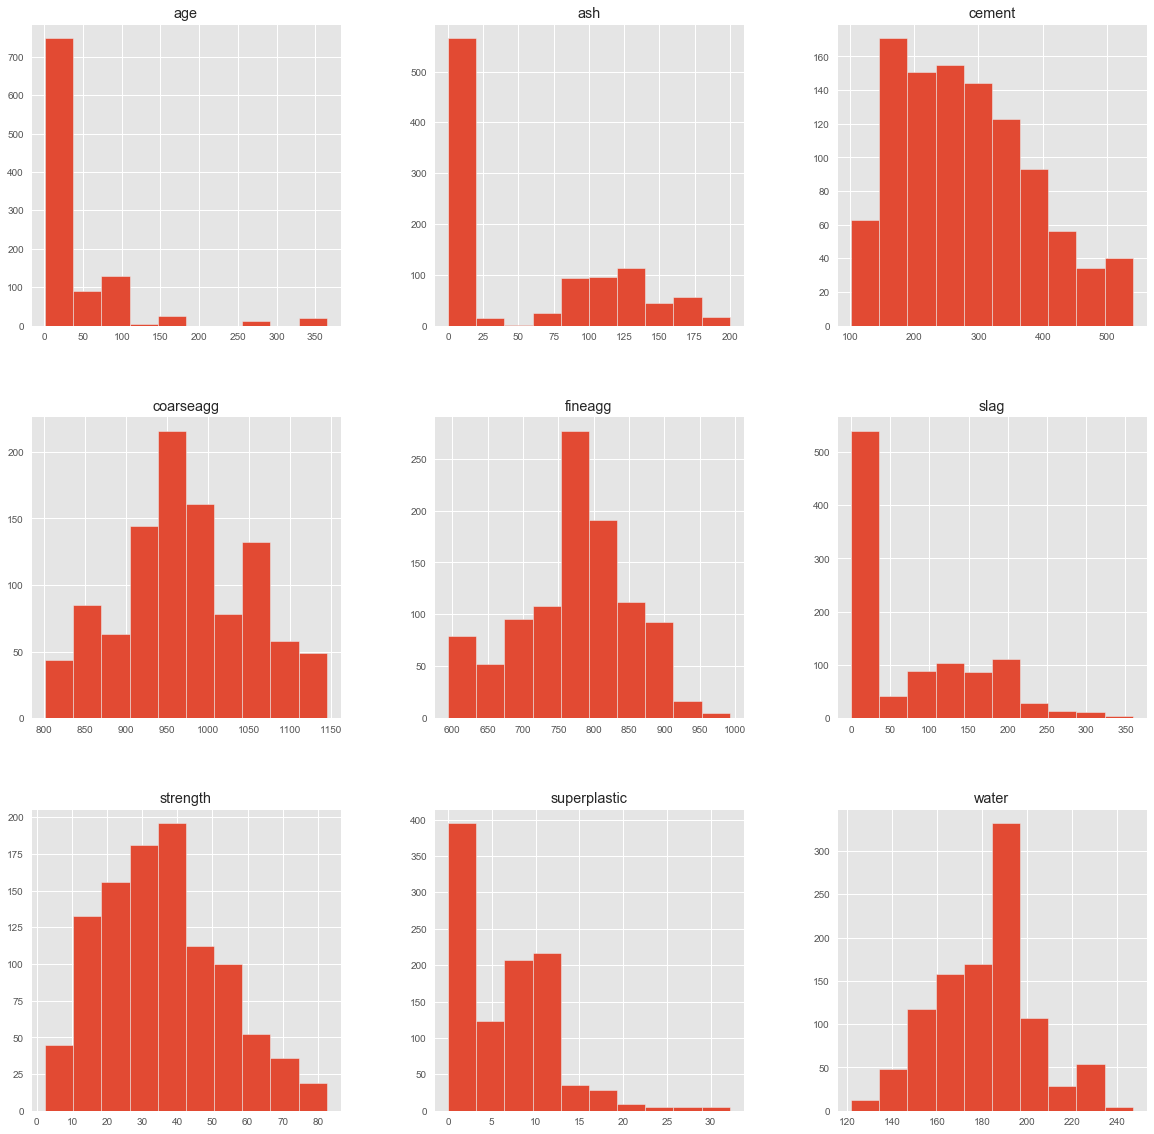

In [11]:
# plot the distributions of the numerical variables
import matplotlib.pyplot as plt
%matplotlib inline

concrete.hist(figsize=(20,20))

# Note that majority of them are skewed

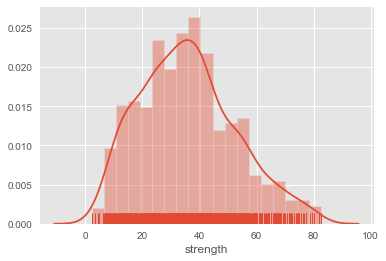

In [12]:
sns.distplot(concrete['strength'], kde=True, rug=True);
# distributio of the Target variable

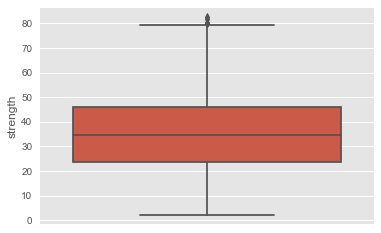

In [13]:
sns.boxplot(y = concrete['strength']);

### Bivariate Analysis

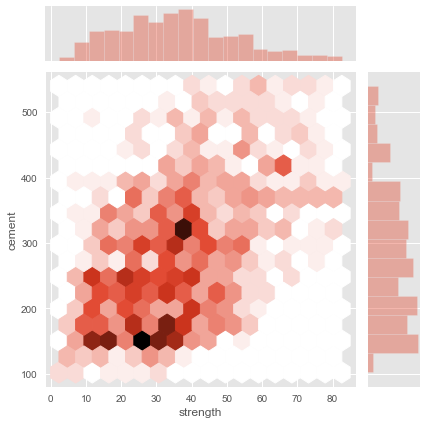

In [14]:
sns.jointplot(concrete['strength'], concrete['cement'], kind="hex");

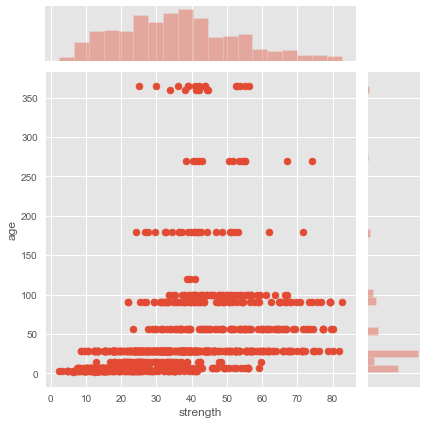

In [15]:
sns.jointplot(concrete['strength'], concrete['age']);

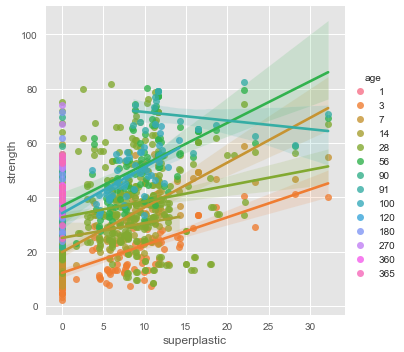

In [16]:
sns.lmplot(y="strength", x="superplastic",hue="age", data=concrete);

### Use correlation method to observe the relationship between different variables

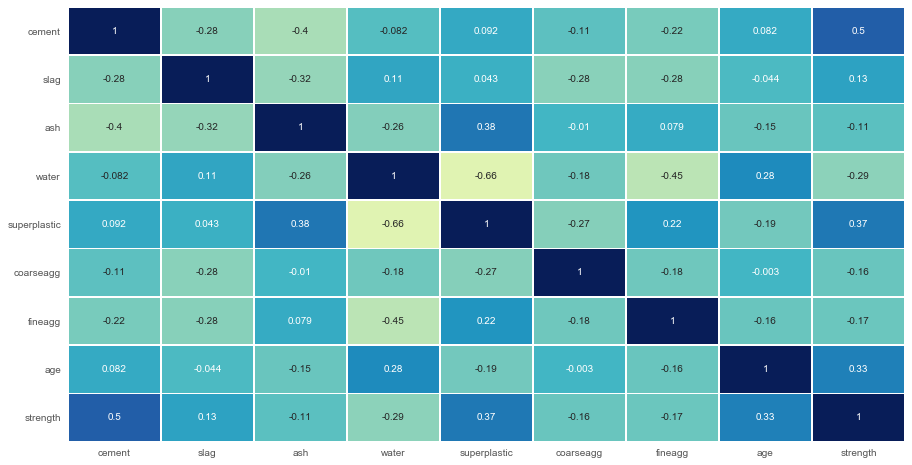

In [17]:
# Correlation is poor amongst the variables
plt.figure(figsize=(15,8))

sns.heatmap(concrete.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

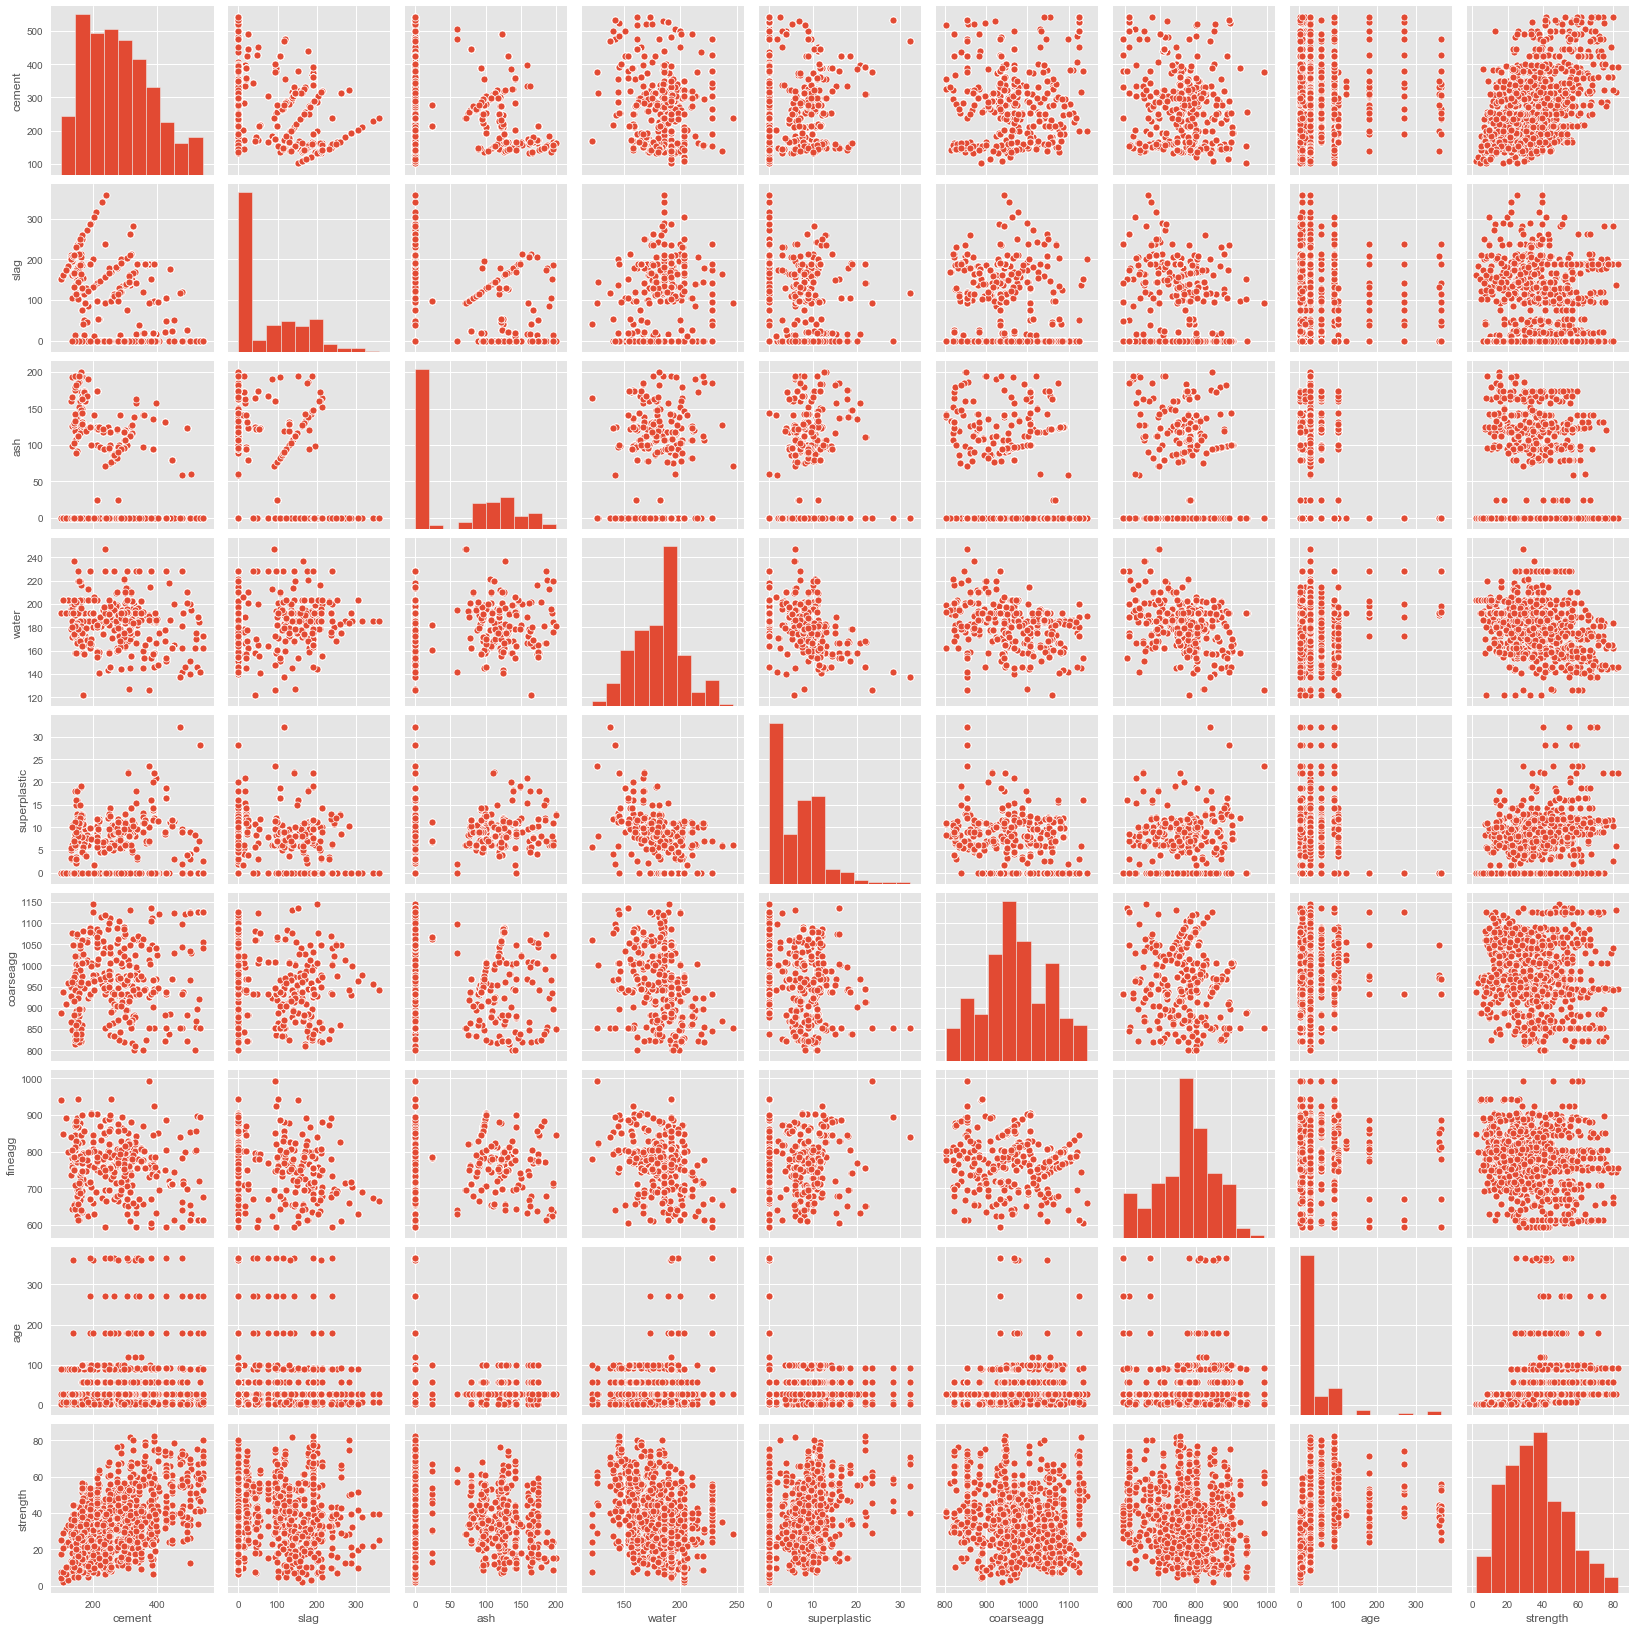

In [18]:
sns.pairplot(concrete)

### Feature Engineering Techniques

In [19]:
# create a new feature 'aggratio' : ratio of the fine agg to the coarse agg
concrete['aggratio'] = concrete['fineagg']/concrete['coarseagg']

In [20]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,aggratio
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89,0.77
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51,0.74
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22,0.90
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85,0.72
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29,0.67


In [21]:
concrete_df = concrete.copy()
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,aggratio
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89,0.77
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51,0.74
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22,0.90
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85,0.72
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29,0.67


In [22]:
# drop 'fineagg' and 'coarseagg' features

concrete_df.drop(['fineagg','coarseagg'], axis=1, inplace=True)
concrete_df.head()

,cement,slag,ash,water,superplastic,age,strength,aggratio
0,141.30,212.00,0.00,203.50,0.00,28,29.89,0.77
1,168.90,42.20,124.30,158.30,10.80,14,23.51,0.74
2,250.00,0.00,95.70,187.40,5.50,28,29.22,0.90
3,266.00,114.00,0.00,228.00,0.00,28,45.85,0.72
4,154.80,183.40,0.00,193.30,9.10,28,18.29,0.67


In [23]:
#Split Data into dependent and independent variables
# Copy all the predictor variables into X dataframe
X = concrete_df.drop('strength', axis=1)

# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
y = concrete_df[['strength']]


In [24]:
from sklearn import preprocessing

# scale all the columns of the dataframe.
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  

In [25]:
# split the dataset into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [26]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(concrete_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(concrete_df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


##### Decide on model complexity

In [27]:
# Import relevant libraries for model-building

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [28]:
# fit a simple linear model to the training set
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.6484686143870122
The coefficient for slag is 0.41842302404282034
The coefficient for ash is 0.22874151593298303
The coefficient for water is -0.2628269469851685
The coefficient for superplastic is 0.11062299432332126
The coefficient for age is 0.4121123989355144
The coefficient for aggratio is 0.028971682658922502


In [29]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.012356999415917266


In [30]:
# Create a regularized RIDGE model and note the coefficients
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.64757045  0.41762117  0.22781627 -0.26250104  0.1112419   0.41182561
   0.02874517]]


In [31]:
# Create a regularized LASSO model and note the coefficients
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model as expected for a LASSO model

Lasso model: [ 0.39456594  0.14777481  0.         -0.11823668  0.19361099  0.2543608
  0.        ]


##### Compare the scores of the unregularised and regularised(Lasso and Ridge) Models

In [32]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.5991483585254107
0.6386742870811555


In [33]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.5991478205378548
0.6385846734747946


In [34]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.5215627623725142
0.51856614888699


In [35]:
# To highlight the non-linear interaction between some dimensions, we create polynomial models

In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, interaction_only=True) # a second-order polynomial function

#poly = PolynomialFeatures(2)

In [37]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 29)

In [38]:
# Note the increase in attributes from 7 in to linear to 29 in the polynomial models

In [39]:
# Fit a simple non regularized linear model on poly features
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[ 1.47870080e-16  1.17197603e+01  8.14611568e+00  4.74367810e+00
 -2.53184207e+00  3.79517926e+00  1.52751230e+01  9.19219210e-01
  1.23584071e+00  1.27581038e+00 -3.23692224e+00 -4.26977529e+00
  2.42600267e+00  1.07549068e+00  1.76622911e+00 -1.32055705e+00
 -2.27090513e+00  3.95220442e+00  1.93335441e+00 -2.63370943e+00
 -5.33772830e+00  6.74812513e+00  1.83338121e+00  1.03296178e-01
 -1.20269024e+00  2.00712675e-01  2.21317448e+00 -1.75667422e+00
  1.77295009e+00]


In [40]:
# Fit a regularized(ridge) linear model on poly features
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.         11.68322734  8.10926133  4.69634551 -2.53647727  3.81365526
  15.23286763  0.9036198   1.2247148   1.26364257 -3.2019742  -4.23923047
   2.35608684  1.07096808  1.74785761 -1.29391854 -2.24211995  3.89347755
   1.92637705 -2.60411805 -5.30921944  6.65547423  1.82674051  0.11529687
  -1.20053457  0.19614953  2.25869375 -1.7509689   1.71833371]]


In [41]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7425650843935899
0.7425654601989601


In [42]:
# Fit a regularized(lasso) linear model on poly features
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.         11.58893971  7.98306607  4.56970962 -2.56724282  3.8409139
 15.14038316  0.85526919  1.14355968  1.19252596 -2.99074606 -4.06333502
  2.0788109   1.02581278  1.60919153 -1.10752008 -2.03306535  3.67504996
  1.85820044 -2.40521022 -5.11561908  6.36128781  1.7474998   0.14658121
 -1.17646227  0.1914043   2.44877834 -1.71521237  1.50817693]


In [43]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7424393227294924
0.7418092263596334


A simple linear model suffers from variance error. it suffers from the curse of dimensionality since there are too many parameters( too many permutation and combination amongst them) to properly fit a linear model. Hence the need to either use  regularised Linear models (e.g Ridge or Lasso) or higher degree models

## Creating the Model and Tuning It

###  Build, Predict, and Evaluate the Models

#### Build model using Decision Tree Regression Algorithm

In [44]:
# Fit the Decision Tree model to the training set
dtree = DecisionTreeRegressor(random_state=3)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [45]:
# Predict
pred_train_tree= dtree.predict(X_train) # performance on train data
pred_test_tree= dtree.predict(X_test)  # performance on test data

# print out the RMSE and r2 Metrics for training set
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

# print out the RMSE and r2 Metrics for test set
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))

1.18587167602258
0.9948592423407845
7.751164585221014
0.7935656835363125


In [46]:
# the model performs very well on the training and poorly on the test. A case of overfit

In [60]:
#Dataframe of the performance metrics from the Decision Tree algorithm
rmse_DT = np.sqrt(mean_squared_error(y_test,pred_test_tree))
r2_DT= r2_score(y_test, pred_test_tree)
# Metrics from the DT
DTResults_DF = pd.DataFrame({'Method':['Decision Tree'], 'RMSE': [rmse_DT], 'r2 Score': [r2_DT]})
DTResults_DF.head()

,Method,RMSE,r2 Score
0,Decision Tree,7.75,0.79


#### Build model using Random Forest Regressor Algorithm

In [47]:
# Fit the Random Forest model to the training set
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train) 

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [48]:
#predict on the training and test dataset
pred_train_rf= model_rf.predict(X_train)
pred_test_rf = model_rf.predict(X_test)

# print out the RMSE and r2 Metrics for training set
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

# print out the RMSE and r2 Metrics for test set
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

2.3214132434158903
0.9803004341911601
5.803405494380446
0.8842785652668829


In [68]:
#Dataframe of the performance metrics from the Random Forest algorithm
rmse_RF = np.sqrt(mean_squared_error(y_test,pred_test_rf))
r2_RF= r2_score(y_test, pred_test_rf)
# Metrics from the RF
RFResults_DF = pd.DataFrame({'Method':['Random Forest'], 'RMSE': [rmse_RF], 'r2 Score': [r2_RF]})
RFResults_DF.head()

,Method,RMSE,r2 Score
0,Random Forest,5.80,0.88


#### Build model using AdaBoost Regression Algorithm

In [49]:
# Fit the AdaBoost Regressor to the training set
abreg = AdaBoostRegressor(random_state=0, n_estimators=100)
abreg.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=0)

In [50]:
# Predict
pred_train_abreg= abreg.predict(X_train)
pred_test_abreg = abreg.predict(X_test)

# print out the RMSE and r2 Metrics for training set
print(np.sqrt(mean_squared_error(y_train,pred_train_abreg)))
print(r2_score(y_train, pred_train_abreg))

# print out the RMSE and r2 Metrics for test set
print(np.sqrt(mean_squared_error(y_test,pred_test_abreg)))
print(r2_score(y_test, pred_test_abreg))

6.759599560141379
0.8329703093587066
8.217727146317516
0.7679661153896343


In [62]:
#Dataframe of the performance metrics from the AdaBoost algorithm
rmse_AB = np.sqrt(mean_squared_error(y_test,pred_test_abreg))
r2_AB= r2_score(y_test, pred_test_abreg)
# Metrics from the AB
ABResults_DF = pd.DataFrame({'Method':['AdaBoost'], 'RMSE': [rmse_AB], 'r2 Score': [r2_AB]})
ABResults_DF.head()

,Method,RMSE,r2 Score
0,AdaBoost,8.22,0.77


#### Build model using GradientBoost Regression Algorithm

In [51]:
# Fit the GradientBoost Regression to the training set
gbreg = GradientBoostingRegressor(random_state=0)
gbreg.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
# Predict
pred_train_gbreg= gbreg.predict(X_train)
pred_test_gbreg = gbreg.predict(X_test)

# print out the RMSE and r2 Metrics for training set
print(np.sqrt(mean_squared_error(y_train,pred_train_gbreg)))
print(r2_score(y_train, pred_train_gbreg))

# print out the RMSE and r2 Metrics for test set
print(np.sqrt(mean_squared_error(y_test,pred_test_gbreg)))
print(r2_score(y_test, pred_test_gbreg))

3.2851896142080617
0.9605476732766783
5.571708045451107
0.8933343266124089


In [63]:
#Dataframe of the performance metrics from the GradientBoost algorithm
rmse_GB = np.sqrt(mean_squared_error(y_test,pred_test_gbreg))
r2_GB= r2_score(y_test, pred_test_gbreg)
# Metrics from the GB
GBResults_DF = pd.DataFrame({'Method':['Gradient Boost'], 'RMSE': [rmse_GB], 'r2 Score': [r2_GB]})
GBResults_DF.head()

,Method,RMSE,r2 Score
0,Gradient Boost,5.57,0.89


####  Build model using Bagging Regression Algorithm

In [53]:
# Fit the Bagging Regression model to the training set
breg = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=0)
breg.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=0, verbose=0,
                 warm_start=False)

In [54]:
# Predict
pred_train_breg= breg.predict(X_train)
pred_test_breg = breg.predict(X_test)

# print out the RMSE and r2 Metrics for training set
print(np.sqrt(mean_squared_error(y_train,pred_train_breg)))
print(r2_score(y_train, pred_train_breg))

# print out the RMSE and r2 Metrics for test set
print(np.sqrt(mean_squared_error(y_test,pred_test_breg)))
print(r2_score(y_test, pred_test_breg))

2.605528484704596
0.9751833366382456
6.186137855696103
0.8685116837709375


In [64]:
#Dataframe of the performance metrics from the Bagging algorithm
rmse_BG = np.sqrt(mean_squared_error(y_test,pred_test_tree))
r2_BG= r2_score(y_test, pred_test_tree)
# Metrics from the BG
BGResults_DF = pd.DataFrame({'Method':['Bagging'], 'RMSE': [rmse_BG], 'r2 Score': [r2_BG]})
BGResults_DF.head()

,Method,RMSE,r2 Score
0,Bagging,7.75,0.79


In [69]:
# Comparison of the results from all the models
# Dataframe comparing all models and their metrics
all_models_results_df = pd.concat([DTResults_DF, RFResults_DF, ABResults_DF, GBResults_DF, BGResults_DF])
all_models_results_df

,Method,RMSE,r2 Score
0,Decision Tree,7.75,0.79
0,Random Forest,5.80,0.88
0,AdaBoost,8.22,0.77
0,Gradient Boost,5.57,0.89
0,Bagging,7.75,0.79


#### Optimizing model parameters using GridSearchCV

In [56]:
# Use Grid Search to find the best parameters for the Gradient Boosting Model
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }
model = GradientBoostingRegressor()
grid = GridSearchCV(estimator=model, param_grid = param_grid, cv = 10, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}

In [57]:
# Use Grid Search to find the best parameters for the Random Forest Model

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  8.2min finished
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [79]:
# use the result of the hyperparameters from the GridSearch to re-run the Random Forest Models and obtain the performance models
updated_pred_train_rf= grid_search.predict(X_train)
updated_pred_test_rf = grid_search.predict(X_test)

# print out the RMSE and r2 Metrics for training set
print(np.sqrt(mean_squared_error(y_train,updated_pred_train_rf)))
print(r2_score(y_train, updated_pred_train_rf))

# print out the RMSE and r2 Metrics for test set
print(np.sqrt(mean_squared_error(y_test,updated_pred_test_rf)))
print(r2_score(y_test, updated_pred_test_rf))

4.589096718541593
0.9230149917892378
6.987330805684519
0.8322468878289068


In [80]:
# use the result of the hyperparameters from the GridSearch to re-run the Bagging Models and obtain the performance models
updated_pred_train_bg= grid.predict(X_train)
updated_pred_test_bg = grid.predict(X_test)

# print out the RMSE and r2 Metrics for training set
print(np.sqrt(mean_squared_error(y_train,updated_pred_train_bg)))
print(r2_score(y_train, updated_pred_train_bg))

# print out the RMSE and r2 Metrics for test set
print(np.sqrt(mean_squared_error(y_test,updated_pred_test_bg)))
print(r2_score(y_test, updated_pred_test_bg))

1.6899956397483467
0.9895594613138037
4.719598457951435
0.9234653540555978


In [84]:
# compare the models before and after hyperparameter tuning#Dataframe of the performance metrics from the Bagging algorithm
rmse_BG_updated = np.sqrt(mean_squared_error(y_test,updated_pred_test_bg))
r2_BG_updated= r2_score(y_test, updated_pred_test_bg)
# Metrics from the BG
Updated_BGResults_DF = pd.DataFrame({'Method':['Updated Bagging'], 'RMSE': [rmse_BG_updated], 'r2 Score': [r2_BG_updated]})
Updated_BGResults_DF.head()

#Dataframe of the performance metrics from the Bagging algorithm
rmse_RF_updated = np.sqrt(mean_squared_error(y_test,updated_pred_test_rf))
r2_RF_updated= r2_score(y_test, updated_pred_test_rf)
# Metrics from the BG
UpdatedRFResults_DF = pd.DataFrame({'Method':['Updated Random Forest'], 'RMSE': [rmse_RF_updated], 'r2 Score': [r2_RF_updated]})
UpdatedRFResults_DF.head()

# Dataframe comparing the models before and after and their metrics
before_after_models_df = pd.concat([RFResults_DF, UpdatedRFResults_DF, BGResults_DF, Updated_BGResults_DF])
before_after_models_df

,Method,RMSE,r2 Score
0,Random Forest,5.80,0.88
0,Updated Random Forest,6.99,0.83
0,Bagging,7.75,0.79
0,Updated Bagging,4.72,0.92
